In [14]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('data/lena.png')

## Affine Transformation - Case 1: rotation 45 > scale 0..5 > shift (x+100, y-50)

In [10]:
M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5)
print(M_rotate)

[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]


In [11]:
M_translate = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)
print(M_translate)

[[  1.   0. 100.]
 [  0.   1. -50.]]


In [12]:
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (cols, rows))

In [13]:
img_show_rotate_trans = np.hstack((img, img_rotate, img_rotate_trans))

In [15]:
cv2.imshow('image rotate and shift', img_show_rotate_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

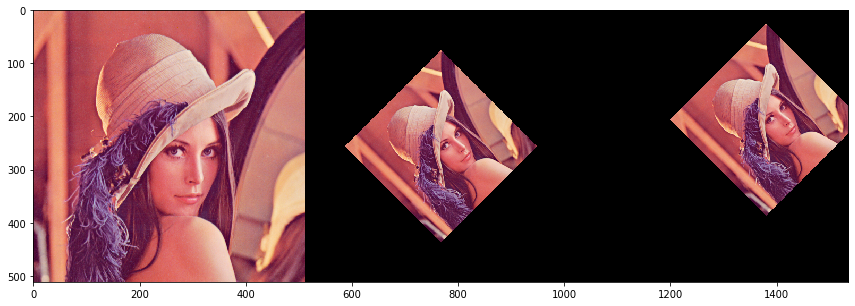

In [22]:
# show inline
plt.figure(figsize=(15,5))
plt.imshow(img_show_rotate_trans[:,:,::-1])

## Affine Transformation - Case 2: any three point

In [ ]:
# 給定兩兩一對，共 3 對點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

In [27]:
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

In [28]:
M_affine = cv2.getAffineTransform(pt1, pt2)
img_copy_affine = cv2.warpAffine(img_copy, M_affine, (cols, rows))

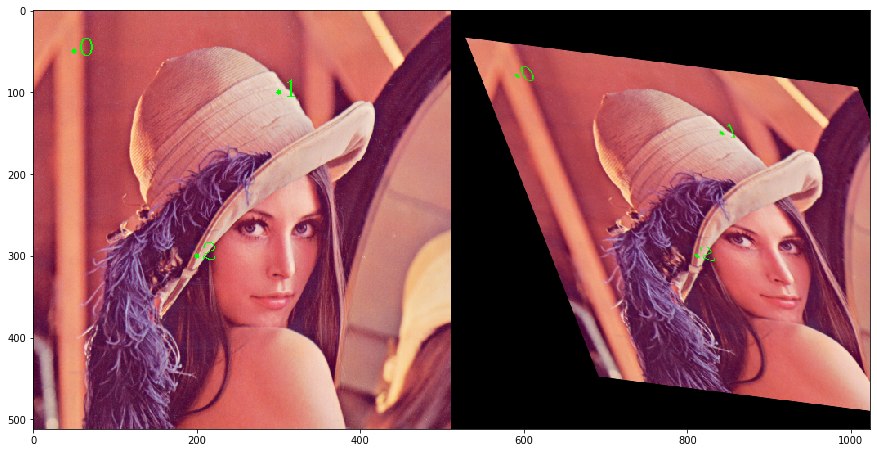

In [30]:
img_show_affine = np.hstack((img_copy, img_copy_affine))
plt.figure(figsize=(15,10))
plt.imshow(img_show_affine[:,:,::-1])